In [5]:
from scripts import split_data
from scripts import createCSV_testing
from scripts import preprocess as pp
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score, precision_score, \
                            recall_score, accuracy_score, classification_report
import pandas as pd
from scripts import feature_extractor as fex
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [6]:
def plot_confusion_matrix(true_labels, predicted_labels, class_labels):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    plt.figure()
    plt.title('Confusion matrix')
    sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=sorted(class_labels), yticklabels=sorted(class_labels))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.draw()
    plt.tight_layout()
    plt.show();

In [7]:
# Set paths
cwd_path = os.getcwd()
train_set_path = cwd_path + "/data/images/training_set/"
val_set_path = cwd_path + "/data/images/val_set/"

dataset_path = cwd_path + '/temp/dataset/'
train_csv = cwd_path + '/data/groundtruth_train.csv'
train_reduced_csv = cwd_path + '/data/reduced_groundtruth_train.csv'
val_csv = cwd_path + '/data/groundtruth_val.csv'
val_reduced_csv = cwd_path + '/data/reduced_groundtruth_val.csv'

# Preprocess data
do_preprocess = True
sample_number=500

# Create directories
os.makedirs(train_set_path, exist_ok=True)
os.makedirs(val_set_path, exist_ok=True)

In [8]:
# Set testing paths
testing_set_path = cwd_path + "/data_testing/images/testing_set/"

dataset_testing_path = cwd_path + '/temp_testing/dataset/'
testing_set_csv = cwd_path + "/data_testing/"
testing_set_csv_path = cwd_path + "/data_testing/testing.csv"

# Create directories
os.makedirs(testing_set_path, exist_ok=True)
os.makedirs(dataset_testing_path, exist_ok=True)

# csv Results path
csv_results_path = cwd_path + "/Results/"

In [9]:
# Skip this step if you intend to use the last dataset split
# Split data
split_data.prepare_dataset(dataset_path,train_set_path, val_set_path, train_csv,
                           val_csv, train_reduced_csv, val_reduced_csv, sample_number)

Training set distribution:
Class: MEL
Number of images: 500
Training set distribution:
Class: NV
Number of images: 500
Training set distribution:
Class: BCC
Number of images: 500
Training set distribution:
Class: AK
Number of images: 500
Training set distribution:
Class: BKL
Number of images: 500
Training set distribution:
Class: DF
Number of images: 218
Training set distribution:
Class: VASC
Number of images: 228
Training set distribution:
Class: SCC
Number of images: 500
##########################################

 Data augmentation for class MEL
MEL has 500 images. Skipping augmenatation for this class

 Data augmentation for class NV
NV has 500 images. Skipping augmenatation for this class

 Data augmentation for class BCC
BCC has 500 images. Skipping augmenatation for this class

 Data augmentation for class AK
AK has 500 images. Skipping augmenatation for this class

 Data augmentation for class BKL
BKL has 500 images. Skipping augmenatation for this class

 Data augmentation for

Add augmented images for ISIC_0031215
Number of samples for class: VASC     408
Add augmented images for ISIC_0071267
Number of samples for class: VASC     413
Add augmented images for ISIC_0031759
Number of samples for class: VASC     418
Add augmented images for ISIC_0059744
Number of samples for class: VASC     423
Add augmented images for ISIC_0068387
Number of samples for class: VASC     428
Add augmented images for ISIC_0026163
Number of samples for class: VASC     433
Add augmented images for ISIC_0032538
Number of samples for class: VASC     438
Add augmented images for ISIC_0070103
Number of samples for class: VASC     443
Add augmented images for ISIC_0025244
Number of samples for class: VASC     448
Add augmented images for ISIC_0024370
Number of samples for class: VASC     453
Add augmented images for ISIC_0025924
Number of samples for class: VASC     458
Add augmented images for ISIC_0024867
Number of samples for class: VASC     463
Add augmented images for ISIC_0070356
Nu

In [10]:
# Skip this step if you intend to use the last dataset split
# Remove black border from training and validation images 
pp.crop_dataset(train_set_path, val_set_path, train_reduced_csv, val_reduced_csv)

Start of training dataset cropping step
0: Cropped training image ISIC_0025729
1: Cropped training image ISIC_0069207
2: Cropped training image ISIC_0030238
3: Cropped training image ISIC_0063027
4: Cropped training image ISIC_0071783
5: Cropped training image ISIC_0031751
6: Cropped training image ISIC_0025409
7: Cropped training image ISIC_0053929
8: Cropped training image ISIC_0027830
9: Cropped training image ISIC_0029202
10: Cropped training image ISIC_0067214
11: Cropped training image ISIC_0028630
12: Cropped training image ISIC_0062171
13: Cropped training image ISIC_0014589_downsampled
14: Cropped training image ISIC_0062295
15: Cropped training image ISIC_0054708
16: Cropped training image ISIC_0066797
17: Cropped training image ISIC_0071891
18: Cropped training image ISIC_0072923
19: Cropped training image ISIC_0029383
20: Cropped training image ISIC_0031370
21: Cropped training image ISIC_0065191
22: Cropped training image ISIC_0064693
23: Cropped training image ISIC_003264

200: Cropped training image ISIC_0055236
201: Cropped training image ISIC_0025258
202: Cropped training image ISIC_0031377
203: Cropped training image ISIC_0027026
204: Cropped training image ISIC_0025191
205: Cropped training image ISIC_0030861
206: Cropped training image ISIC_0071377
207: Cropped training image ISIC_0027039
208: Cropped training image ISIC_0062125
209: Cropped training image ISIC_0053870
210: Cropped training image ISIC_0063166
211: Cropped training image ISIC_0025570
212: Cropped training image ISIC_0001374_downsampled
213: Cropped training image ISIC_0072318
214: Cropped training image ISIC_0011200
215: Cropped training image ISIC_0054480
216: Cropped training image ISIC_0069033
217: Cropped training image ISIC_0059771
218: Cropped training image ISIC_0025553
219: Cropped training image ISIC_0014815_downsampled
220: Cropped training image ISIC_0028262
221: Cropped training image ISIC_0029269
222: Cropped training image ISIC_0026910
223: Cropped training image ISIC_

395: Cropped training image ISIC_0062148
396: Cropped training image ISIC_0029905
397: Cropped training image ISIC_0068615
398: Cropped training image ISIC_0029265
399: Cropped training image ISIC_0027787
400: Cropped training image ISIC_0033838
401: Cropped training image ISIC_0071093
402: Cropped training image ISIC_0065403
403: Cropped training image ISIC_0057863
404: Cropped training image ISIC_0004715_downsampled
405: Cropped training image ISIC_0009951
406: Cropped training image ISIC_0057607
407: Cropped training image ISIC_0032068
408: Cropped training image ISIC_0024437
409: Cropped training image ISIC_0067354
410: Cropped training image ISIC_0011137
411: Cropped training image ISIC_0062442
412: Cropped training image ISIC_0033409
413: Cropped training image ISIC_0070794
414: Cropped training image ISIC_0054251
415: Cropped training image ISIC_0013220_downsampled
416: Cropped training image ISIC_0025853
417: Cropped training image ISIC_0061125
418: Cropped training image ISIC_

595: Cropped training image ISIC_0057714
596: Cropped training image ISIC_0057195
597: Cropped training image ISIC_0033553
598: Cropped training image ISIC_0070880
599: Cropped training image ISIC_0032583
600: Cropped training image ISIC_0063723
601: Cropped training image ISIC_0034005
602: Cropped training image ISIC_0009979
603: Cropped training image ISIC_0066967
604: Cropped training image ISIC_0066257
605: Cropped training image ISIC_0026521
606: Cropped training image ISIC_0060218
607: Cropped training image ISIC_0071759
608: Cropped training image ISIC_0069302
609: Cropped training image ISIC_0028120
610: Cropped training image ISIC_0029215
611: Cropped training image ISIC_0030920
612: Cropped training image ISIC_0033803
613: Cropped training image ISIC_0057141
614: Cropped training image ISIC_0069777
615: Cropped training image ISIC_0059227
616: Cropped training image ISIC_0000046_downsampled
617: Cropped training image ISIC_0056036
618: Cropped training image ISIC_0014337_down

795: Cropped training image ISIC_0063962
796: Cropped training image ISIC_0000551
797: Cropped training image ISIC_0028873
798: Cropped training image ISIC_0070489
799: Cropped training image ISIC_0054704
800: Cropped training image ISIC_0000115_downsampled
801: Cropped training image ISIC_0059313
802: Cropped training image ISIC_0063099
803: Cropped training image ISIC_0071060
804: Cropped training image ISIC_0062960
805: Cropped training image ISIC_0026741
806: Cropped training image ISIC_0058156
807: Cropped training image ISIC_0071180
808: Cropped training image ISIC_0000350
809: Cropped training image ISIC_0026355
810: Cropped training image ISIC_0072385
811: Cropped training image ISIC_0014139_downsampled
812: Cropped training image ISIC_0028665
813: Cropped training image ISIC_0054116
814: Cropped training image ISIC_0029398
815: Cropped training image ISIC_0070460
816: Cropped training image ISIC_0072833
817: Cropped training image ISIC_0064659
818: Cropped training image ISIC_

994: Cropped training image ISIC_0028173
995: Cropped training image ISIC_0055279
996: Cropped training image ISIC_0014504_downsampled
997: Cropped training image ISIC_0058212
998: Cropped training image ISIC_0063241
999: Cropped training image ISIC_0001102_downsampled
1000: Cropped training image ISIC_0053678
1001: Cropped training image ISIC_0054942
1002: Cropped training image ISIC_0060680
1003: Cropped training image ISIC_0032763
1004: Cropped training image ISIC_0033579
1005: Cropped training image ISIC_0068281
1006: Cropped training image ISIC_0058663
1007: Cropped training image ISIC_0062817
1008: Cropped training image ISIC_0026959
1009: Cropped training image ISIC_0068677
1010: Cropped training image ISIC_0054618
1011: Cropped training image ISIC_0062340
1012: Cropped training image ISIC_0065389
1013: Cropped training image ISIC_0073136
1014: Cropped training image ISIC_0068768
1015: Cropped training image ISIC_0013981_downsampled
1016: Cropped training image ISIC_0070511
1017

1187: Cropped training image ISIC_0061035
1188: Cropped training image ISIC_0064460
1189: Cropped training image ISIC_0062496
1190: Cropped training image ISIC_0063828
1191: Cropped training image ISIC_0060133
1192: Cropped training image ISIC_0053840
1193: Cropped training image ISIC_0029805
1194: Cropped training image ISIC_0060155
1195: Cropped training image ISIC_0066922
1196: Cropped training image ISIC_0068792
1197: Cropped training image ISIC_0061388
1198: Cropped training image ISIC_0053762
1199: Cropped training image ISIC_0024475
1200: Cropped training image ISIC_0060685
1201: Cropped training image ISIC_0070693
1202: Cropped training image ISIC_0033626
1203: Cropped training image ISIC_0014626_downsampled
1204: Cropped training image ISIC_0072559
1205: Cropped training image ISIC_0029033
1206: Cropped training image ISIC_0068280
1207: Cropped training image ISIC_0027825
1208: Cropped training image ISIC_0066945
1209: Cropped training image ISIC_0056531
1210: Cropped training

1388: Cropped training image ISIC_0070539
1389: Cropped training image ISIC_0065875
1390: Cropped training image ISIC_0024371
1391: Cropped training image ISIC_0062915
1392: Cropped training image ISIC_0064686
1393: Cropped training image ISIC_0030783
1394: Cropped training image ISIC_0064521
1395: Cropped training image ISIC_0063467
1396: Cropped training image ISIC_0056175
1397: Cropped training image ISIC_0032827
1398: Cropped training image ISIC_0026046
1399: Cropped training image ISIC_0063725
1400: Cropped training image ISIC_0028763
1401: Cropped training image ISIC_0013637_downsampled
1402: Cropped training image ISIC_0070940
1403: Cropped training image ISIC_0056677
1404: Cropped training image ISIC_0057997
1405: Cropped training image ISIC_0061946
1406: Cropped training image ISIC_0031489
1407: Cropped training image ISIC_0034100
1408: Cropped training image ISIC_0071817
1409: Cropped training image ISIC_0064900
1410: Cropped training image ISIC_0072471
1411: Cropped training

1585: Cropped training image ISIC_0056899
1586: Cropped training image ISIC_0061867
1587: Cropped training image ISIC_0072877
1588: Cropped training image ISIC_0054346
1589: Cropped training image ISIC_0061407
1590: Cropped training image ISIC_0033910
1591: Cropped training image ISIC_0067992
1592: Cropped training image ISIC_0061315
1593: Cropped training image ISIC_0070744
1594: Cropped training image ISIC_0070904
1595: Cropped training image ISIC_0024412
1596: Cropped training image ISIC_0053479
1597: Cropped training image ISIC_0058016
1598: Cropped training image ISIC_0026156
1599: Cropped training image ISIC_0064096
1600: Cropped training image ISIC_0056058
1601: Cropped training image ISIC_0072057
1602: Cropped training image ISIC_0053766
1603: Cropped training image ISIC_0057121
1604: Cropped training image ISIC_0060683
1605: Cropped training image ISIC_0053944
1606: Cropped training image ISIC_0069818
1607: Cropped training image ISIC_0058163
1608: Cropped training image ISIC_

1779: Cropped training image ISIC_0057010
1780: Cropped training image ISIC_0059295
1781: Cropped training image ISIC_0053700
1782: Cropped training image ISIC_0072985
1783: Cropped training image ISIC_0014103_downsampled
1784: Cropped training image ISIC_0033946
1785: Cropped training image ISIC_0054978
1786: Cropped training image ISIC_0028376
1787: Cropped training image ISIC_0013079_downsampled
1788: Cropped training image ISIC_0014772_downsampled
1789: Cropped training image ISIC_0061862
1790: Cropped training image ISIC_0067513
1791: Cropped training image ISIC_0056517
1792: Cropped training image ISIC_0069659
1793: Cropped training image ISIC_0068153
1794: Cropped training image ISIC_0024875
1795: Cropped training image ISIC_0066507
1796: Cropped training image ISIC_0030712
1797: Cropped training image ISIC_0055762
1798: Cropped training image ISIC_0027063
1799: Cropped training image ISIC_0071550
1800: Cropped training image ISIC_0064915
1801: Cropped training image ISIC_006199

1971: Cropped training image ISIC_0065416
1972: Cropped training image ISIC_0068777
1973: Cropped training image ISIC_0061239
1974: Cropped training image ISIC_0072693
1975: Cropped training image ISIC_0030319
1976: Cropped training image ISIC_0055178
1977: Cropped training image ISIC_0057280
1978: Cropped training image ISIC_0025594
1979: Cropped training image ISIC_0067135
1980: Cropped training image ISIC_0070146
1981: Cropped training image ISIC_0071649
1982: Cropped training image ISIC_0064570
1983: Cropped training image ISIC_0054900
1984: Cropped training image ISIC_0070656
1985: Cropped training image ISIC_0062119
1986: Cropped training image ISIC_0054531
1987: Cropped training image ISIC_0071930
1988: Cropped training image ISIC_0068856
1989: Cropped training image ISIC_0061658
1990: Cropped training image ISIC_0060040
1991: Cropped training image ISIC_0070730
1992: Cropped training image ISIC_0057248
1993: Cropped training image ISIC_0059250
1994: Cropped training image ISIC_

2164: Cropped training image ISIC_0065455
2165: Cropped training image ISIC_0059191
2166: Cropped training image ISIC_0032439
2167: Cropped training image ISIC_0067940
2168: Cropped training image ISIC_0056516
2169: Cropped training image ISIC_0055027
2170: Cropped training image ISIC_0069016
2171: Cropped training image ISIC_0028122
2172: Cropped training image ISIC_0053515
2173: Cropped training image ISIC_0061234
2174: Cropped training image ISIC_0025182
2175: Cropped training image ISIC_0068270
2176: Cropped training image ISIC_0069265
2177: Cropped training image ISIC_0063519
2178: Cropped training image ISIC_0060288
2179: Cropped training image ISIC_0062346
2180: Cropped training image ISIC_0053935
2181: Cropped training image ISIC_0027025
2182: Cropped training image ISIC_0072347
2183: Cropped training image ISIC_0068387
2184: Cropped training image ISIC_0069577
2185: Cropped training image ISIC_0060161
2186: Cropped training image ISIC_0063199
2187: Cropped training image ISIC_

2358: Cropped training image ISIC_0030926
2359: Cropped training image ISIC_0062165
2360: Cropped training image ISIC_0067423
2361: Cropped training image ISIC_0065321
2362: Cropped training image ISIC_0030721
2363: Cropped training image ISIC_0013134_downsampled
2364: Cropped training image ISIC_0032404
2365: Cropped training image ISIC_0027513
2366: Cropped training image ISIC_0071962
2367: Cropped training image ISIC_0028656
2368: Cropped training image ISIC_0057063
2369: Cropped training image ISIC_0060122
2370: Cropped training image ISIC_0069948
2371: Cropped training image ISIC_0061747
2372: Cropped training image ISIC_0069220
2373: Cropped training image ISIC_0061679
2374: Cropped training image ISIC_0014410_downsampled
2375: Cropped training image ISIC_0025470
2376: Cropped training image ISIC_0027188
2377: Cropped training image ISIC_0067604
2378: Cropped training image ISIC_0024370
2379: Cropped training image ISIC_0072307
2380: Cropped training image ISIC_0065862
2381: Crop

2556: Cropped training image ISIC_0033456
2557: Cropped training image ISIC_0029634
2558: Cropped training image ISIC_0026393
2559: Cropped training image ISIC_0059403
2560: Cropped training image ISIC_0028393
2561: Cropped training image ISIC_0032238
2562: Cropped training image ISIC_0072158
2563: Cropped training image ISIC_0031922
2564: Cropped training image ISIC_0056956
2565: Cropped training image ISIC_0071711
2566: Cropped training image ISIC_0061582
2567: Cropped training image ISIC_0071423
2568: Cropped training image ISIC_0024330
2569: Cropped training image ISIC_0057041
2570: Cropped training image ISIC_0028314
2571: Cropped training image ISIC_0063883
2572: Cropped training image ISIC_0028735
2573: Cropped training image ISIC_0062043
2574: Cropped training image ISIC_0031659
2575: Cropped training image ISIC_0057770
2576: Cropped training image ISIC_0066296
2577: Cropped training image ISIC_0072152
2578: Cropped training image ISIC_0025314
2579: Cropped training image ISIC_

2759: Cropped training image ISIC_0033591
2760: Cropped training image ISIC_0026206
2761: Cropped training image ISIC_0031271
2762: Cropped training image ISIC_0062738
2763: Cropped training image ISIC_0064151
2764: Cropped training image ISIC_0062095
2765: Cropped training image ISIC_0056005
2766: Cropped training image ISIC_0026466
2767: Cropped training image ISIC_0031901
2768: Cropped training image ISIC_0066648
2769: Cropped training image ISIC_0068676
2770: Cropped training image ISIC_0066938
2771: Cropped training image ISIC_0062494
2772: Cropped training image ISIC_0033869
2773: Cropped training image ISIC_0062646
2774: Cropped training image ISIC_0054555
2775: Cropped training image ISIC_0064789
2776: Cropped training image ISIC_0029889
2777: Cropped training image ISIC_0060926
2778: Cropped training image ISIC_0025373
2779: Cropped training image ISIC_0029362
2780: Cropped training image ISIC_0056913
2781: Cropped training image ISIC_0054533
2782: Cropped training image ISIC_

2960: Cropped training image ISIC_0072265
2961: Cropped training image ISIC_0060776
2962: Cropped training image ISIC_0062903
2963: Cropped training image ISIC_0030021
2964: Cropped training image ISIC_0063206
2965: Cropped training image ISIC_0053457
2966: Cropped training image ISIC_0030844
2967: Cropped training image ISIC_0072628
2968: Cropped training image ISIC_0065472
2969: Cropped training image ISIC_0061280
2970: Cropped training image ISIC_0056886
2971: Cropped training image ISIC_0055280
2972: Cropped training image ISIC_0072911
2973: Cropped training image ISIC_0027903
2974: Cropped training image ISIC_0055732
2975: Cropped training image ISIC_0033358
2976: Cropped training image ISIC_0062697
2977: Cropped training image ISIC_0070895
2978: Cropped training image ISIC_0032014
2979: Cropped training image ISIC_0068071
2980: Cropped training image ISIC_0071002
2981: Cropped training image ISIC_0025780
2982: Cropped training image ISIC_0068805
2983: Cropped training image ISIC_

3156: Cropped training image ISIC_0059484
3157: Cropped training image ISIC_0056920
3158: Cropped training image ISIC_0070085
3159: Cropped training image ISIC_0025992
3160: Cropped training image ISIC_0070445
3161: Cropped training image ISIC_0071509
3162: Cropped training image ISIC_0033969
3163: Cropped training image ISIC_0070224
3164: Cropped training image ISIC_0055316
3165: Cropped training image ISIC_0067762
3166: Cropped training image ISIC_0059152
3167: Cropped training image ISIC_0032371
3168: Cropped training image ISIC_0029573
3169: Cropped training image ISIC_0063944
3170: Cropped training image ISIC_0062653
3171: Cropped training image ISIC_0032890
3172: Cropped training image ISIC_0071318
3173: Cropped training image ISIC_0064409
3174: Cropped training image ISIC_0026417
3175: Cropped training image ISIC_0031735
3176: Cropped training image ISIC_0029578
3177: Cropped training image ISIC_0054163
3178: Cropped training image ISIC_0025411
3179: Cropped training image ISIC_

3359: Cropped training image ISIC_0061599
3360: Cropped training image ISIC_0032270
3361: Cropped training image ISIC_0068666
3362: Cropped training image ISIC_0066446
3363: Cropped training image ISIC_0027343
3364: Cropped training image ISIC_0073012
3365: Cropped training image ISIC_0072969
3366: Cropped training image ISIC_0030956
3367: Cropped training image ISIC_0031692
3368: Cropped training image ISIC_0031955
3369: Cropped training image ISIC_0067081
3370: Cropped training image ISIC_0026132
3371: Cropped training image ISIC_0031852
3372: Cropped training image ISIC_0063701
3373: Cropped training image ISIC_0058246
3374: Cropped training image ISIC_0033158
3375: Cropped training image ISIC_0029932
3376: Cropped training image ISIC_0024517
3377: Cropped training image ISIC_0033031
3378: Cropped training image ISIC_0033808
3379: Cropped training image ISIC_0029514
3380: Cropped training image ISIC_0026092
3381: Cropped training image ISIC_0028146
3382: Cropped training image ISIC_

3549: Cropped training image ISIC_0066632_noise
3550: Cropped training image ISIC_0066632_rotate
3551: Cropped training image ISIC_0027488_fliph
3552: Cropped training image ISIC_0027488_flipv
3553: Cropped training image ISIC_0027488_bright
3554: Cropped training image ISIC_0027488_noise
3555: Cropped training image ISIC_0027488_rotate
3556: Cropped training image ISIC_0061305_fliph
3557: Cropped training image ISIC_0061305_flipv
3558: Cropped training image ISIC_0061305_bright
3559: Cropped training image ISIC_0061305_noise
3560: Cropped training image ISIC_0061305_rotate
3561: Cropped training image ISIC_0028346_fliph
3562: Cropped training image ISIC_0028346_flipv
3563: Cropped training image ISIC_0028346_bright
3564: Cropped training image ISIC_0028346_noise
3565: Cropped training image ISIC_0028346_rotate
3566: Cropped training image ISIC_0063817_fliph
3567: Cropped training image ISIC_0063817_flipv
3568: Cropped training image ISIC_0063817_bright
3569: Cropped training image ISI

3723: Cropped training image ISIC_0027626_bright
3724: Cropped training image ISIC_0027626_noise
3725: Cropped training image ISIC_0027626_rotate
3726: Cropped training image ISIC_0024386_fliph
3727: Cropped training image ISIC_0024386_flipv
3728: Cropped training image ISIC_0024386_bright
3729: Cropped training image ISIC_0024386_noise
3730: Cropped training image ISIC_0024386_rotate
3731: Cropped training image ISIC_0032775_fliph
3732: Cropped training image ISIC_0032775_flipv
3733: Cropped training image ISIC_0032775_bright
3734: Cropped training image ISIC_0032775_noise
3735: Cropped training image ISIC_0032775_rotate
3736: Cropped training image ISIC_0031276_fliph
3737: Cropped training image ISIC_0031276_flipv
3738: Cropped training image ISIC_0031276_bright
3739: Cropped training image ISIC_0031276_noise
3740: Cropped training image ISIC_0031276_rotate
3741: Cropped training image ISIC_0033608_fliph
3742: Cropped training image ISIC_0033608_flipv
3743: Cropped training image ISI

3895: Cropped training image ISIC_0055342_rotate
3896: Cropped training image ISIC_0027983_fliph
3897: Cropped training image ISIC_0027983_flipv
3898: Cropped training image ISIC_0027983_bright
3899: Cropped training image ISIC_0027983_noise
3900: Cropped training image ISIC_0027983_rotate
3901: Cropped training image ISIC_0027563_fliph
3902: Cropped training image ISIC_0027563_flipv
3903: Cropped training image ISIC_0027563_bright
3904: Cropped training image ISIC_0027563_noise
3905: Cropped training image ISIC_0027563_rotate
3906: Cropped training image ISIC_0070899_fliph
3907: Cropped training image ISIC_0070899_flipv
3908: Cropped training image ISIC_0070899_bright
3909: Cropped training image ISIC_0070899_noise
3910: Cropped training image ISIC_0070899_rotate
3911: Cropped training image ISIC_0031215_fliph
3912: Cropped training image ISIC_0031215_flipv
3913: Cropped training image ISIC_0031215_bright
3914: Cropped training image ISIC_0031215_noise
3915: Cropped training image ISI

71: Cropped validation image ISIC_0029494
72: Cropped validation image ISIC_0072363
73: Cropped validation image ISIC_0069488
74: Cropped validation image ISIC_0033834
75: Cropped validation image ISIC_0068536
76: Cropped validation image ISIC_0064193
77: Cropped validation image ISIC_0063101
78: Cropped validation image ISIC_0056067
79: Cropped validation image ISIC_0063475
80: Cropped validation image ISIC_0012265_downsampled
81: Cropped validation image ISIC_0063047
82: Cropped validation image ISIC_0024430
83: Cropped validation image ISIC_0031162
84: Cropped validation image ISIC_0025166
85: Cropped validation image ISIC_0013335_downsampled
86: Cropped validation image ISIC_0032273
87: Cropped validation image ISIC_0064546
88: Cropped validation image ISIC_0030246
89: Cropped validation image ISIC_0059623
90: Cropped validation image ISIC_0014770_downsampled
91: Cropped validation image ISIC_0063607
92: Cropped validation image ISIC_0015987_downsampled
93: Cropped validation image

265: Cropped validation image ISIC_0073086
266: Cropped validation image ISIC_0065585
267: Cropped validation image ISIC_0068396
268: Cropped validation image ISIC_0058501
269: Cropped validation image ISIC_0027635
270: Cropped validation image ISIC_0070169
271: Cropped validation image ISIC_0068116
272: Cropped validation image ISIC_0013559_downsampled
273: Cropped validation image ISIC_0027111
274: Cropped validation image ISIC_0028634
275: Cropped validation image ISIC_0056541
276: Cropped validation image ISIC_0014768_downsampled
277: Cropped validation image ISIC_0007528_downsampled
278: Cropped validation image ISIC_0063234
279: Cropped validation image ISIC_0031802
280: Cropped validation image ISIC_0029103
281: Cropped validation image ISIC_0024607
282: Cropped validation image ISIC_0014270_downsampled
283: Cropped validation image ISIC_0030157
284: Cropped validation image ISIC_0053685
285: Cropped validation image ISIC_0015942_downsampled
286: Cropped validation image ISIC_00

456: Cropped validation image ISIC_0061996
457: Cropped validation image ISIC_0061179
458: Cropped validation image ISIC_0031690
459: Cropped validation image ISIC_0054287
460: Cropped validation image ISIC_0027548
461: Cropped validation image ISIC_0026169
462: Cropped validation image ISIC_0054334
463: Cropped validation image ISIC_0059243
464: Cropped validation image ISIC_0025246
465: Cropped validation image ISIC_0061167
466: Cropped validation image ISIC_0000495
467: Cropped validation image ISIC_0055043
468: Cropped validation image ISIC_0024770
469: Cropped validation image ISIC_0026591
470: Cropped validation image ISIC_0031931
471: Cropped validation image ISIC_0069591
472: Cropped validation image ISIC_0071931
473: Cropped validation image ISIC_0031529
474: Cropped validation image ISIC_0054131
475: Cropped validation image ISIC_0062743
476: Cropped validation image ISIC_0033789
477: Cropped validation image ISIC_0009869
478: Cropped validation image ISIC_0072557
479: Croppe

650: Cropped validation image ISIC_0056953
651: Cropped validation image ISIC_0057561
652: Cropped validation image ISIC_0063682
653: Cropped validation image ISIC_0027218
654: Cropped validation image ISIC_0057332
655: Cropped validation image ISIC_0054413
656: Cropped validation image ISIC_0031939
657: Cropped validation image ISIC_0057287
658: Cropped validation image ISIC_0069650
659: Cropped validation image ISIC_0033218
660: Cropped validation image ISIC_0032316
661: Cropped validation image ISIC_0064156
662: Cropped validation image ISIC_0070963
663: Cropped validation image ISIC_0060744
664: Cropped validation image ISIC_0060257
665: Cropped validation image ISIC_0054635
666: Cropped validation image ISIC_0014929_downsampled
667: Cropped validation image ISIC_0065757
668: Cropped validation image ISIC_0056030
669: Cropped validation image ISIC_0025668
670: Cropped validation image ISIC_0060370
671: Cropped validation image ISIC_0073164
672: Cropped validation image ISIC_0053710

838: Cropped validation image ISIC_0013977_downsampled
839: Cropped validation image ISIC_0030214
840: Cropped validation image ISIC_0031937
841: Cropped validation image ISIC_0056237
842: Cropped validation image ISIC_0025786
843: Cropped validation image ISIC_0032954
844: Cropped validation image ISIC_0027612
845: Cropped validation image ISIC_0058195
846: Cropped validation image ISIC_0063748
847: Cropped validation image ISIC_0068707
848: Cropped validation image ISIC_0026599
849: Cropped validation image ISIC_0057534
850: Cropped validation image ISIC_0058680
851: Cropped validation image ISIC_0013398_downsampled
852: Cropped validation image ISIC_0069754
853: Cropped validation image ISIC_0029050
854: Cropped validation image ISIC_0054069
855: Cropped validation image ISIC_0058399
856: Cropped validation image ISIC_0025758
857: Cropped validation image ISIC_0072874
858: Cropped validation image ISIC_0028385
859: Cropped validation image ISIC_0061550
860: Cropped validation image 

1023: Cropped validation image ISIC_0069304
1024: Cropped validation image ISIC_0057633
1025: Cropped validation image ISIC_0065818
1026: Cropped validation image ISIC_0009961
1027: Cropped validation image ISIC_0026663
1028: Cropped validation image ISIC_0030644
1029: Cropped validation image ISIC_0068494
1030: Cropped validation image ISIC_0000545
1031: Cropped validation image ISIC_0027911
1032: Cropped validation image ISIC_0062439
1033: Cropped validation image ISIC_0029183
1034: Cropped validation image ISIC_0055690
1035: Cropped validation image ISIC_0055038
1036: Cropped validation image ISIC_0014080_downsampled
1037: Cropped validation image ISIC_0068210
1038: Cropped validation image ISIC_0028193
1039: Cropped validation image ISIC_0009956
1040: Cropped validation image ISIC_0032902
1041: Cropped validation image ISIC_0028100
1042: Cropped validation image ISIC_0066850
1043: Cropped validation image ISIC_0059001
1044: Cropped validation image ISIC_0071707
1045: Cropped valida

1207: Cropped validation image ISIC_0013159_downsampled
1208: Cropped validation image ISIC_0073126
1209: Cropped validation image ISIC_0033481
1210: Cropped validation image ISIC_0033893
1211: Cropped validation image ISIC_0068460
1212: Cropped validation image ISIC_0055810
1213: Cropped validation image ISIC_0061742
1214: Cropped validation image ISIC_0069610
1215: Cropped validation image ISIC_0024552
1216: Cropped validation image ISIC_0027417
1217: Cropped validation image ISIC_0030212
1218: Cropped validation image ISIC_0025423
1219: Cropped validation image ISIC_0031160
1220: Cropped validation image ISIC_0054741
1221: Cropped validation image ISIC_0067139
1222: Cropped validation image ISIC_0032740
1223: Cropped validation image ISIC_0067403
1224: Cropped validation image ISIC_0060117
1225: Cropped validation image ISIC_0070613
1226: Cropped validation image ISIC_0030047
1227: Cropped validation image ISIC_0055994
1228: Cropped validation image ISIC_0065441
1229: Cropped valida

1393: Cropped validation image ISIC_0064690
1394: Cropped validation image ISIC_0066816
1395: Cropped validation image ISIC_0063988
1396: Cropped validation image ISIC_0025171
1397: Cropped validation image ISIC_0032628
1398: Cropped validation image ISIC_0033859
1399: Cropped validation image ISIC_0059109
1400: Cropped validation image ISIC_0060746
1401: Cropped validation image ISIC_0014652_downsampled
1402: Cropped validation image ISIC_0025036
1403: Cropped validation image ISIC_0067697
1404: Cropped validation image ISIC_0027267
1405: Cropped validation image ISIC_0031579
1406: Cropped validation image ISIC_0024632
1407: Cropped validation image ISIC_0014869_downsampled
1408: Cropped validation image ISIC_0062950
1409: Cropped validation image ISIC_0033689
1410: Cropped validation image ISIC_0029146
1411: Cropped validation image ISIC_0027134
1412: Cropped validation image ISIC_0073170
1413: Cropped validation image ISIC_0026271
1414: Cropped validation image ISIC_0014291_downsamp

1575: Cropped validation image ISIC_0057057
1576: Cropped validation image ISIC_0059093
1577: Cropped validation image ISIC_0058684
1578: Cropped validation image ISIC_0072446
1579: Cropped validation image ISIC_0026361
1580: Cropped validation image ISIC_0012447_downsampled
1581: Cropped validation image ISIC_0034188
1582: Cropped validation image ISIC_0011143
1583: Cropped validation image ISIC_0061870
1584: Cropped validation image ISIC_0069863
1585: Cropped validation image ISIC_0065623
1586: Cropped validation image ISIC_0033866
1587: Cropped validation image ISIC_0033237
1588: Cropped validation image ISIC_0032178
1589: Cropped validation image ISIC_0026849
1590: Cropped validation image ISIC_0026122
1591: Cropped validation image ISIC_0029586
1592: Cropped validation image ISIC_0032157
1593: Cropped validation image ISIC_0032488
1594: Cropped validation image ISIC_0032085
1595: Cropped validation image ISIC_0067874
1596: Cropped validation image ISIC_0056313
1597: Cropped valida

1765: Cropped validation image ISIC_0067751
1766: Cropped validation image ISIC_0065558
1767: Cropped validation image ISIC_0064603
1768: Cropped validation image ISIC_0072894
1769: Cropped validation image ISIC_0058594
1770: Cropped validation image ISIC_0062963
1771: Cropped validation image ISIC_0030576
1772: Cropped validation image ISIC_0029672
1773: Cropped validation image ISIC_0060243
1774: Cropped validation image ISIC_0024922
1775: Cropped validation image ISIC_0064293
1776: Cropped validation image ISIC_0055937
1777: Cropped validation image ISIC_0024712
1778: Cropped validation image ISIC_0032233
1779: Cropped validation image ISIC_0013393_downsampled
1780: Cropped validation image ISIC_0030320
1781: Cropped validation image ISIC_0073199
1782: Cropped validation image ISIC_0064883
1783: Cropped validation image ISIC_0025019
1784: Cropped validation image ISIC_0056440
1785: Cropped validation image ISIC_0025186
1786: Cropped validation image ISIC_0065313
1787: Cropped valida

1953: Cropped validation image ISIC_0073208
1954: Cropped validation image ISIC_0068539
1955: Cropped validation image ISIC_0031859
1956: Cropped validation image ISIC_0059382
1957: Cropped validation image ISIC_0030025
1958: Cropped validation image ISIC_0068900
1959: Cropped validation image ISIC_0063046
1960: Cropped validation image ISIC_0024745
1961: Cropped validation image ISIC_0061739
1962: Cropped validation image ISIC_0032887
1963: Cropped validation image ISIC_0026202
1964: Cropped validation image ISIC_0069307
1965: Cropped validation image ISIC_0065602
1966: Cropped validation image ISIC_0029748
1967: Cropped validation image ISIC_0010213
1968: Cropped validation image ISIC_0059697
1969: Cropped validation image ISIC_0069738
1970: Cropped validation image ISIC_0068505
1971: Cropped validation image ISIC_0055086
1972: Cropped validation image ISIC_0070328
1973: Cropped validation image ISIC_0027997
1974: Cropped validation image ISIC_0071102
1975: Cropped validation image I

2142: Cropped validation image ISIC_0026924
2143: Cropped validation image ISIC_0065510
2144: Cropped validation image ISIC_0010476
2145: Cropped validation image ISIC_0027517
2146: Cropped validation image ISIC_0025892
2147: Cropped validation image ISIC_0026582
2148: Cropped validation image ISIC_0033598
2149: Cropped validation image ISIC_0071580
2150: Cropped validation image ISIC_0071598
2151: Cropped validation image ISIC_0071236
2152: Cropped validation image ISIC_0068383
2153: Cropped validation image ISIC_0064496
2154: Cropped validation image ISIC_0063232
2155: Cropped validation image ISIC_0030741
2156: Cropped validation image ISIC_0066247
2157: Cropped validation image ISIC_0070728
2158: Cropped validation image ISIC_0071316
2159: Cropped validation image ISIC_0063947
2160: Cropped validation image ISIC_0054202
2161: Cropped validation image ISIC_0034120
2162: Cropped validation image ISIC_0027579
2163: Cropped validation image ISIC_0013173_downsampled
2164: Cropped valida

2328: Cropped validation image ISIC_0010227
2329: Cropped validation image ISIC_0057153
2330: Cropped validation image ISIC_0012845_downsampled
2331: Cropped validation image ISIC_0071772
2332: Cropped validation image ISIC_0059538
2333: Cropped validation image ISIC_0063227
2334: Cropped validation image ISIC_0065282
2335: Cropped validation image ISIC_0071360
2336: Cropped validation image ISIC_0027325
2337: Cropped validation image ISIC_0028762
2338: Cropped validation image ISIC_0067683
2339: Cropped validation image ISIC_0067341
2340: Cropped validation image ISIC_0030728
2341: Cropped validation image ISIC_0064697
2342: Cropped validation image ISIC_0033674
2343: Cropped validation image ISIC_0062754
2344: Cropped validation image ISIC_0066157
2345: Cropped validation image ISIC_0062034
2346: Cropped validation image ISIC_0024331
2347: Cropped validation image ISIC_0030251
2348: Cropped validation image ISIC_0028053
2349: Cropped validation image ISIC_0031626
2350: Cropped valida

2517: Cropped validation image ISIC_0034267
2518: Cropped validation image ISIC_0071313
2519: Cropped validation image ISIC_0073194
2520: Cropped validation image ISIC_0068334
2521: Cropped validation image ISIC_0033772
2522: Cropped validation image ISIC_0032648
2523: Cropped validation image ISIC_0031403
2524: Cropped validation image ISIC_0010342
2525: Cropped validation image ISIC_0025852
2526: Cropped validation image ISIC_0000466
2527: Cropped validation image ISIC_0061825
2528: Cropped validation image ISIC_0066237
2529: Cropped validation image ISIC_0014716_downsampled
2530: Cropped validation image ISIC_0030876
2531: Cropped validation image ISIC_0032760
2532: Cropped validation image ISIC_0033878
2533: Cropped validation image ISIC_0066391
Finished cropping step of validation dataset
cropped validation images saved in /home/abdul/uni/ism/project/pastukai/data/images/val_set/
Finished Cropping all images


In [11]:
# Get output classes from training and validation data. You can not skip this step.
train_classes, val_classes = split_data.read_csv_files(train_reduced_csv, val_reduced_csv)

In [12]:
X_train_all_features, X_test_all_features = fex.extract_features(train_classes, val_classes, train_set_path, val_set_path)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train_all_features)
X_test = scaler.transform(X_test_all_features)

Y_train = list(train_classes.values())
Y_validation = list(val_classes.keys())
Y_test = list(val_classes.values())

In [15]:
print("Training the SVM classifier...")

param_grid = {'C': [1, 1e1, 1e2, 1e3, 5e3, 1e4],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'class_weight': [None, 'balanced']}
clf = GridSearchCV(svm.SVC(kernel='rbf', probability=True), param_grid, verbose=10)
clf = clf.fit(X_train, Y_train)



print("Best estimator found by Grid Search:")
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

Training the SVM classifier...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] C=1, class_weight=None, gamma=0.0001 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, gamma=0.0001, score=0.143, total=  58.4s
[CV] C=1, class_weight=None, gamma=0.0001 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.4s remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0001, score=0.125, total=  56.0s
[CV] C=1, class_weight=None, gamma=0.0001 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0001, score=0.125, total=  57.5s
[CV] C=1, class_weight=None, gamma=0.0001 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.9min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0001, score=0.125, total=  59.0s
[CV] C=1, class_weight=None, gamma=0.0001 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.8min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0001, score=0.125, total=  58.4s
[CV] C=1, class_weight=None, gamma=0.0005 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.8min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0005, score=0.143, total=  56.3s
[CV] C=1, class_weight=None, gamma=0.0005 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.8min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0005, score=0.125, total=  57.2s
[CV] C=1, class_weight=None, gamma=0.0005 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  6.7min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0005, score=0.125, total=  56.0s
[CV] C=1, class_weight=None, gamma=0.0005 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.6min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0005, score=0.125, total=  56.0s
[CV] C=1, class_weight=None, gamma=0.0005 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.6min remaining:    0.0s


[CV]  C=1, class_weight=None, gamma=0.0005, score=0.125, total=  55.8s
[CV] C=1, class_weight=None, gamma=0.001 .............................
[CV] . C=1, class_weight=None, gamma=0.001, score=0.202, total=  59.3s
[CV] C=1, class_weight=None, gamma=0.001 .............................
[CV] . C=1, class_weight=None, gamma=0.001, score=0.238, total=  58.3s
[CV] C=1, class_weight=None, gamma=0.001 .............................
[CV] . C=1, class_weight=None, gamma=0.001, score=0.200, total=  58.7s
[CV] C=1, class_weight=None, gamma=0.001 .............................
[CV] . C=1, class_weight=None, gamma=0.001, score=0.172, total=  57.8s
[CV] C=1, class_weight=None, gamma=0.001 .............................
[CV] . C=1, class_weight=None, gamma=0.001, score=0.165, total=  58.6s
[CV] C=1, class_weight=None, gamma=0.005 .............................
[CV] . C=1, class_weight=None, gamma=0.005, score=0.304, total=  55.0s
[CV] C=1, class_weight=None, gamma=0.005 .............................
[CV] .

[CV]  C=10.0, class_weight=None, gamma=0.0005, score=0.298, total=  54.8s
[CV] C=10.0, class_weight=None, gamma=0.0005 .........................
[CV]  C=10.0, class_weight=None, gamma=0.0005, score=0.348, total=  54.4s
[CV] C=10.0, class_weight=None, gamma=0.0005 .........................
[CV]  C=10.0, class_weight=None, gamma=0.0005, score=0.303, total=  54.2s
[CV] C=10.0, class_weight=None, gamma=0.0005 .........................
[CV]  C=10.0, class_weight=None, gamma=0.0005, score=0.358, total=  54.7s
[CV] C=10.0, class_weight=None, gamma=0.001 ..........................
[CV]  C=10.0, class_weight=None, gamma=0.001, score=0.337, total=  50.5s
[CV] C=10.0, class_weight=None, gamma=0.001 ..........................
[CV]  C=10.0, class_weight=None, gamma=0.001, score=0.317, total=  51.2s
[CV] C=10.0, class_weight=None, gamma=0.001 ..........................
[CV]  C=10.0, class_weight=None, gamma=0.001, score=0.408, total=  52.4s
[CV] C=10.0, class_weight=None, gamma=0.001 ...............

[CV]  C=100.0, class_weight=None, gamma=0.0001, score=0.343, total=  48.8s
[CV] C=100.0, class_weight=None, gamma=0.0001 ........................
[CV]  C=100.0, class_weight=None, gamma=0.0001, score=0.381, total=  49.2s
[CV] C=100.0, class_weight=None, gamma=0.0005 ........................
[CV]  C=100.0, class_weight=None, gamma=0.0005, score=0.399, total=  40.5s
[CV] C=100.0, class_weight=None, gamma=0.0005 ........................
[CV]  C=100.0, class_weight=None, gamma=0.0005, score=0.376, total=  40.6s
[CV] C=100.0, class_weight=None, gamma=0.0005 ........................
[CV]  C=100.0, class_weight=None, gamma=0.0005, score=0.439, total=  41.3s
[CV] C=100.0, class_weight=None, gamma=0.0005 ........................
[CV]  C=100.0, class_weight=None, gamma=0.0005, score=0.407, total=  40.8s
[CV] C=100.0, class_weight=None, gamma=0.0005 ........................
[CV]  C=100.0, class_weight=None, gamma=0.0005, score=0.439, total=  41.3s
[CV] C=100.0, class_weight=None, gamma=0.001 ....

[CV]  C=100.0, class_weight=balanced, gamma=0.1, score=0.563, total=  31.6s
[CV] C=1000.0, class_weight=None, gamma=0.0001 .......................
[CV]  C=1000.0, class_weight=None, gamma=0.0001, score=0.419, total=  37.8s
[CV] C=1000.0, class_weight=None, gamma=0.0001 .......................
[CV]  C=1000.0, class_weight=None, gamma=0.0001, score=0.392, total=  37.9s
[CV] C=1000.0, class_weight=None, gamma=0.0001 .......................
[CV]  C=1000.0, class_weight=None, gamma=0.0001, score=0.464, total=  38.8s
[CV] C=1000.0, class_weight=None, gamma=0.0001 .......................
[CV]  C=1000.0, class_weight=None, gamma=0.0001, score=0.424, total=  38.3s
[CV] C=1000.0, class_weight=None, gamma=0.0001 .......................
[CV]  C=1000.0, class_weight=None, gamma=0.0001, score=0.462, total=  38.7s
[CV] C=1000.0, class_weight=None, gamma=0.0005 .......................
[CV]  C=1000.0, class_weight=None, gamma=0.0005, score=0.463, total=  32.8s
[CV] C=1000.0, class_weight=None, gamma=0.

[CV]  C=1000.0, class_weight=balanced, gamma=0.1, score=0.499, total=  32.8s
[CV] C=1000.0, class_weight=balanced, gamma=0.1 ......................
[CV]  C=1000.0, class_weight=balanced, gamma=0.1, score=0.439, total=  32.4s
[CV] C=1000.0, class_weight=balanced, gamma=0.1 ......................
[CV]  C=1000.0, class_weight=balanced, gamma=0.1, score=0.539, total=  33.9s
[CV] C=1000.0, class_weight=balanced, gamma=0.1 ......................
[CV]  C=1000.0, class_weight=balanced, gamma=0.1, score=0.539, total=  33.8s
[CV] C=1000.0, class_weight=balanced, gamma=0.1 ......................
[CV]  C=1000.0, class_weight=balanced, gamma=0.1, score=0.548, total=  34.5s
[CV] C=5000.0, class_weight=None, gamma=0.0001 .......................
[CV]  C=5000.0, class_weight=None, gamma=0.0001, score=0.463, total=  32.8s
[CV] C=5000.0, class_weight=None, gamma=0.0001 .......................
[CV]  C=5000.0, class_weight=None, gamma=0.0001, score=0.408, total=  32.8s
[CV] C=5000.0, class_weight=None, gam

[CV]  C=5000.0, class_weight=balanced, gamma=0.01, score=0.444, total=  35.7s
[CV] C=5000.0, class_weight=balanced, gamma=0.01 .....................
[CV]  C=5000.0, class_weight=balanced, gamma=0.01, score=0.526, total=  37.6s
[CV] C=5000.0, class_weight=balanced, gamma=0.01 .....................
[CV]  C=5000.0, class_weight=balanced, gamma=0.01, score=0.517, total=  37.7s
[CV] C=5000.0, class_weight=balanced, gamma=0.01 .....................
[CV]  C=5000.0, class_weight=balanced, gamma=0.01, score=0.523, total=  38.0s
[CV] C=5000.0, class_weight=balanced, gamma=0.1 ......................
[CV]  C=5000.0, class_weight=balanced, gamma=0.1, score=0.504, total=  32.9s
[CV] C=5000.0, class_weight=balanced, gamma=0.1 ......................
[CV]  C=5000.0, class_weight=balanced, gamma=0.1, score=0.434, total=  32.3s
[CV] C=5000.0, class_weight=balanced, gamma=0.1 ......................
[CV]  C=5000.0, class_weight=balanced, gamma=0.1, score=0.542, total=  34.0s
[CV] C=5000.0, class_weight=bal

[CV]  C=10000.0, class_weight=balanced, gamma=0.005, score=0.516, total=  38.9s
[CV] C=10000.0, class_weight=balanced, gamma=0.005 ...................
[CV]  C=10000.0, class_weight=balanced, gamma=0.005, score=0.513, total=  39.3s
[CV] C=10000.0, class_weight=balanced, gamma=0.005 ...................
[CV]  C=10000.0, class_weight=balanced, gamma=0.005, score=0.523, total=  39.5s
[CV] C=10000.0, class_weight=balanced, gamma=0.01 ....................
[CV]  C=10000.0, class_weight=balanced, gamma=0.01, score=0.505, total=  39.4s
[CV] C=10000.0, class_weight=balanced, gamma=0.01 ....................
[CV]  C=10000.0, class_weight=balanced, gamma=0.01, score=0.442, total=  38.8s
[CV] C=10000.0, class_weight=balanced, gamma=0.01 ....................
[CV]  C=10000.0, class_weight=balanced, gamma=0.01, score=0.519, total=  40.7s
[CV] C=10000.0, class_weight=balanced, gamma=0.01 ....................
[CV]  C=10000.0, class_weight=balanced, gamma=0.01, score=0.517, total=  41.4s
[CV] C=10000.0, cl

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 239.3min finished


Best estimator found by Grid Search:
SVC(C=100.0, gamma=0.1, probability=True)


*** TEST SET PERFORMANCE EVALUATION - Segmentation + Feature Extraction + SVM ***
Accuracy: 0.479
F1-score: 0.518
Recall: 0.479
Precision: 0.618

Classification report:
              precision    recall  f1-score   support

         MEL       0.18      0.60      0.27        80
          NV       0.41      0.38      0.39       341
         BCC       0.32      0.43      0.37       256
          AK       0.11      0.52      0.18        21
         BKL       0.44      0.42      0.43       462
          DF       0.86      0.52      0.65      1283
        VASC       0.21      0.59      0.30        66
         SCC       0.14      0.60      0.23        25

    accuracy                           0.48      2534
   macro avg       0.33      0.51      0.35      2534
weighted avg       0.62      0.48      0.52      2534



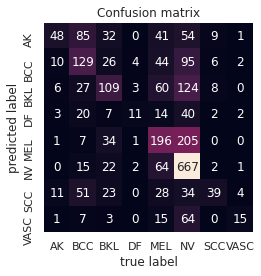

In [16]:
class_labels = ['MEL','NV','BCC','AK','BKL','DF','VASC','SCC']
print('*** TEST SET PERFORMANCE EVALUATION - Segmentation + Feature Extraction + SVM ***')
# compute and plot performance metrics
accuracy = accuracy_score(Y_test, y_pred)
val_f1 = f1_score(Y_test, y_pred, average='weighted')
val_recall = recall_score(Y_test, y_pred, average='weighted')
val_precision = precision_score(Y_test, y_pred, average='weighted')

print('Accuracy: {:.3f}'.format(accuracy))
print('F1-score: {:.3f}'.format(val_f1))
print('Recall: {:.3f}'.format(val_recall))
print('Precision: {:.3f}'.format(val_precision))

print('\nClassification report:')
print(classification_report(Y_test, y_pred, target_names=class_labels))

plot_confusion_matrix(Y_test, y_pred, class_labels)

In [17]:
# create csv fil efor validation results
predicted_val_prob =  clf.predict_proba(X_test)
max_predictions = createCSV_testing.getMaxPredictions(predicted_val_prob)

max_predictions = [element * 100 for element in max_predictions]
createCSV_testing.create_results_file_csv(csv_results_path, "SVM_validierung", Y_validation, y_pred,max_predictions)

CSV file is created successfully.


In [18]:
# create testing csv file 
createCSV_testing.create_testing_file_csv(dataset_testing_path, testing_set_csv, testing_set_path)

CSV file is created successfully.


In [19]:
# Remove black border from testing images
pp.crop_testing_dataset(dataset_testing_path, testing_set_path, testing_set_csv_path)

Start of training dataset cropping step
0: Cropped testing image ISIC_0065551
1: Cropped testing image ISIC_0054064
2: Cropped testing image ISIC_0053494
3: Cropped testing image ISIC_0059409
4: Cropped testing image ISIC_0066528
5: Cropped testing image ISIC_0062289
6: Cropped testing image ISIC_0054808
7: Cropped testing image ISIC_0035772
8: Cropped testing image ISIC_0061576
9: Cropped testing image ISIC_0069360
10: Cropped testing image ISIC_0035566
11: Cropped testing image ISIC_0072369
12: Cropped testing image ISIC_0057789
13: Cropped testing image ISIC_0070758
14: Cropped testing image ISIC_0067481
15: Cropped testing image ISIC_0055597
16: Cropped testing image ISIC_0035804
17: Cropped testing image ISIC_0072883
18: Cropped testing image ISIC_0072483
19: Cropped testing image ISIC_0064929
20: Cropped testing image ISIC_0035529
21: Cropped testing image ISIC_0034778
22: Cropped testing image ISIC_0067152
23: Cropped testing image ISIC_0034490
24: Cropped testing image ISIC_003

207: Cropped testing image ISIC_0065479
208: Cropped testing image ISIC_0056678
209: Cropped testing image ISIC_0056892
210: Cropped testing image ISIC_0053743
211: Cropped testing image ISIC_0061542
212: Cropped testing image ISIC_0066496
213: Cropped testing image ISIC_0035493
214: Cropped testing image ISIC_0035301
215: Cropped testing image ISIC_0055821
216: Cropped testing image ISIC_0056390
217: Cropped testing image ISIC_0060598
218: Cropped testing image ISIC_0068604
219: Cropped testing image ISIC_0059514
220: Cropped testing image ISIC_0067184
221: Cropped testing image ISIC_0060695
222: Cropped testing image ISIC_0068603
223: Cropped testing image ISIC_0056653
224: Cropped testing image ISIC_0034324
225: Cropped testing image ISIC_0063545
226: Cropped testing image ISIC_0069397
227: Cropped testing image ISIC_0059288
228: Cropped testing image ISIC_0069834
229: Cropped testing image ISIC_0066447
230: Cropped testing image ISIC_0053486
231: Cropped testing image ISIC_0062436


412: Cropped testing image ISIC_0061856
413: Cropped testing image ISIC_0072273
414: Cropped testing image ISIC_0066800
415: Cropped testing image ISIC_0035834
416: Cropped testing image ISIC_0054980
417: Cropped testing image ISIC_0067191
418: Cropped testing image ISIC_0073139
419: Cropped testing image ISIC_0057682
420: Cropped testing image ISIC_0064558
421: Cropped testing image ISIC_0056847
422: Cropped testing image ISIC_0069771
423: Cropped testing image ISIC_0058437
424: Cropped testing image ISIC_0065165
425: Cropped testing image ISIC_0035006
426: Cropped testing image ISIC_0062563
427: Cropped testing image ISIC_0072242
428: Cropped testing image ISIC_0072118
429: Cropped testing image ISIC_0035078
430: Cropped testing image ISIC_0066559
431: Cropped testing image ISIC_0035988
432: Cropped testing image ISIC_0065160
433: Cropped testing image ISIC_0069811
434: Cropped testing image ISIC_0059591
435: Cropped testing image ISIC_0035393
436: Cropped testing image ISIC_0069994


621: Cropped testing image ISIC_0064047
622: Cropped testing image ISIC_0055830
623: Cropped testing image ISIC_0054152
624: Cropped testing image ISIC_0035442
625: Cropped testing image ISIC_0072592
626: Cropped testing image ISIC_0054372
627: Cropped testing image ISIC_0067939
628: Cropped testing image ISIC_0062328
629: Cropped testing image ISIC_0058697
630: Cropped testing image ISIC_0062882
631: Cropped testing image ISIC_0071358
632: Cropped testing image ISIC_0063306
633: Cropped testing image ISIC_0070781
634: Cropped testing image ISIC_0060655
635: Cropped testing image ISIC_0055220
636: Cropped testing image ISIC_0034944
637: Cropped testing image ISIC_0054399
638: Cropped testing image ISIC_0061721
639: Cropped testing image ISIC_0070908
640: Cropped testing image ISIC_0068026
641: Cropped testing image ISIC_0064174
642: Cropped testing image ISIC_0055456
643: Cropped testing image ISIC_0034648
644: Cropped testing image ISIC_0062053
645: Cropped testing image ISIC_0065871


830: Cropped testing image ISIC_0055329
831: Cropped testing image ISIC_0062969
832: Cropped testing image ISIC_0061034
833: Cropped testing image ISIC_0071252
834: Cropped testing image ISIC_0059483
835: Cropped testing image ISIC_0035624
836: Cropped testing image ISIC_0062594
837: Cropped testing image ISIC_0053979
838: Cropped testing image ISIC_0062937
839: Cropped testing image ISIC_0062690
840: Cropped testing image ISIC_0070218
841: Cropped testing image ISIC_0066813
842: Cropped testing image ISIC_0034792
843: Cropped testing image ISIC_0071584
844: Cropped testing image ISIC_0054003
845: Cropped testing image ISIC_0054656
846: Cropped testing image ISIC_0071790
847: Cropped testing image ISIC_0057735
848: Cropped testing image ISIC_0073185
849: Cropped testing image ISIC_0068202
850: Cropped testing image ISIC_0056338
851: Cropped testing image ISIC_0035224
852: Cropped testing image ISIC_0035211
853: Cropped testing image ISIC_0035186
854: Cropped testing image ISIC_0072354


1035: Cropped testing image ISIC_0055445
1036: Cropped testing image ISIC_0057895
1037: Cropped testing image ISIC_0034658
1038: Cropped testing image ISIC_0054916
1039: Cropped testing image ISIC_0071219
1040: Cropped testing image ISIC_0065036
1041: Cropped testing image ISIC_0069028
1042: Cropped testing image ISIC_0061528
1043: Cropped testing image ISIC_0067441
1044: Cropped testing image ISIC_0035487
1045: Cropped testing image ISIC_0064136
1046: Cropped testing image ISIC_0034941
1047: Cropped testing image ISIC_0072756
1048: Cropped testing image ISIC_0068304
1049: Cropped testing image ISIC_0069564
1050: Cropped testing image ISIC_0071525
1051: Cropped testing image ISIC_0071677
1052: Cropped testing image ISIC_0062852
1053: Cropped testing image ISIC_0034733
1054: Cropped testing image ISIC_0069431
1055: Cropped testing image ISIC_0035597
1056: Cropped testing image ISIC_0056658
1057: Cropped testing image ISIC_0063955
1058: Cropped testing image ISIC_0063741
1059: Cropped te

1236: Cropped testing image ISIC_0056065
1237: Cropped testing image ISIC_0069697
1238: Cropped testing image ISIC_0056382
1239: Cropped testing image ISIC_0067791
1240: Cropped testing image ISIC_0035310
1241: Cropped testing image ISIC_0067931
1242: Cropped testing image ISIC_0034758
1243: Cropped testing image ISIC_0071578
1244: Cropped testing image ISIC_0065000
1245: Cropped testing image ISIC_0067872
1246: Cropped testing image ISIC_0067385
1247: Cropped testing image ISIC_0060410
1248: Cropped testing image ISIC_0060816
1249: Cropped testing image ISIC_0056464
1250: Cropped testing image ISIC_0059991
1251: Cropped testing image ISIC_0055067
1252: Cropped testing image ISIC_0036012
1253: Cropped testing image ISIC_0053590
1254: Cropped testing image ISIC_0036063
1255: Cropped testing image ISIC_0067560
1256: Cropped testing image ISIC_0068094
1257: Cropped testing image ISIC_0057848
1258: Cropped testing image ISIC_0063423
1259: Cropped testing image ISIC_0055267
1260: Cropped te

1436: Cropped testing image ISIC_0064776
1437: Cropped testing image ISIC_0034970
1438: Cropped testing image ISIC_0035385
1439: Cropped testing image ISIC_0072884
1440: Cropped testing image ISIC_0064465
1441: Cropped testing image ISIC_0058203
1442: Cropped testing image ISIC_0035723
1443: Cropped testing image ISIC_0072525
1444: Cropped testing image ISIC_0070989
1445: Cropped testing image ISIC_0058253
1446: Cropped testing image ISIC_0061367
1447: Cropped testing image ISIC_0072922
1448: Cropped testing image ISIC_0068937
1449: Cropped testing image ISIC_0072680
1450: Cropped testing image ISIC_0057750
1451: Cropped testing image ISIC_0057524
1452: Cropped testing image ISIC_0058406
1453: Cropped testing image ISIC_0072529
1454: Cropped testing image ISIC_0071081
1455: Cropped testing image ISIC_0060095
1456: Cropped testing image ISIC_0062952
1457: Cropped testing image ISIC_0035704
1458: Cropped testing image ISIC_0035088
1459: Cropped testing image ISIC_0058969
1460: Cropped te

1641: Cropped testing image ISIC_0035312
1642: Cropped testing image ISIC_0068446
1643: Cropped testing image ISIC_0035016
1644: Cropped testing image ISIC_0059151
1645: Cropped testing image ISIC_0068055
1646: Cropped testing image ISIC_0067950
1647: Cropped testing image ISIC_0057613
1648: Cropped testing image ISIC_0059003
1649: Cropped testing image ISIC_0067968
1650: Cropped testing image ISIC_0068943
1651: Cropped testing image ISIC_0061779
1652: Cropped testing image ISIC_0053869
1653: Cropped testing image ISIC_0067880
1654: Cropped testing image ISIC_0057030
1655: Cropped testing image ISIC_0034902
1656: Cropped testing image ISIC_0070869
1657: Cropped testing image ISIC_0069681
1658: Cropped testing image ISIC_0053942
1659: Cropped testing image ISIC_0058818
1660: Cropped testing image ISIC_0058316
1661: Cropped testing image ISIC_0063839
1662: Cropped testing image ISIC_0058238
1663: Cropped testing image ISIC_0063459
1664: Cropped testing image ISIC_0073076
1665: Cropped te

1843: Cropped testing image ISIC_0072689
1844: Cropped testing image ISIC_0065456
1845: Cropped testing image ISIC_0055093
1846: Cropped testing image ISIC_0053888
1847: Cropped testing image ISIC_0054009
1848: Cropped testing image ISIC_0034618
1849: Cropped testing image ISIC_0035593
1850: Cropped testing image ISIC_0057632
1851: Cropped testing image ISIC_0035722
1852: Cropped testing image ISIC_0070206
1853: Cropped testing image ISIC_0035012
1854: Cropped testing image ISIC_0070349
1855: Cropped testing image ISIC_0035941
1856: Cropped testing image ISIC_0034766
1857: Cropped testing image ISIC_0034447
1858: Cropped testing image ISIC_0035456
1859: Cropped testing image ISIC_0062826
1860: Cropped testing image ISIC_0035802
1861: Cropped testing image ISIC_0067787
1862: Cropped testing image ISIC_0068290
1863: Cropped testing image ISIC_0056367
1864: Cropped testing image ISIC_0058440
1865: Cropped testing image ISIC_0073188
1866: Cropped testing image ISIC_0034374
1867: Cropped te

2051: Cropped testing image ISIC_0069005
2052: Cropped testing image ISIC_0061771
2053: Cropped testing image ISIC_0034554
2054: Cropped testing image ISIC_0067393
2055: Cropped testing image ISIC_0068589
2056: Cropped testing image ISIC_0072148
2057: Cropped testing image ISIC_0035425
2058: Cropped testing image ISIC_0067977
2059: Cropped testing image ISIC_0035432
2060: Cropped testing image ISIC_0057508
2061: Cropped testing image ISIC_0069350
2062: Cropped testing image ISIC_0035009
2063: Cropped testing image ISIC_0067644
2064: Cropped testing image ISIC_0054550
2065: Cropped testing image ISIC_0064065
2066: Cropped testing image ISIC_0072198
2067: Cropped testing image ISIC_0072130
2068: Cropped testing image ISIC_0058281
2069: Cropped testing image ISIC_0065884
2070: Cropped testing image ISIC_0067994
2071: Cropped testing image ISIC_0067619
2072: Cropped testing image ISIC_0056081
2073: Cropped testing image ISIC_0071301
2074: Cropped testing image ISIC_0066669
2075: Cropped te

2259: Cropped testing image ISIC_0071456
2260: Cropped testing image ISIC_0062922
2261: Cropped testing image ISIC_0053782
2262: Cropped testing image ISIC_0056798
2263: Cropped testing image ISIC_0064366
2264: Cropped testing image ISIC_0053866
2265: Cropped testing image ISIC_0057217
2266: Cropped testing image ISIC_0058386
2267: Cropped testing image ISIC_0069870
2268: Cropped testing image ISIC_0055530
2269: Cropped testing image ISIC_0061122
2270: Cropped testing image ISIC_0034421
2271: Cropped testing image ISIC_0061255
2272: Cropped testing image ISIC_0034538
2273: Cropped testing image ISIC_0063041
2274: Cropped testing image ISIC_0034369
2275: Cropped testing image ISIC_0035401
2276: Cropped testing image ISIC_0034503
2277: Cropped testing image ISIC_0035136
2278: Cropped testing image ISIC_0061107
2279: Cropped testing image ISIC_0066494
2280: Cropped testing image ISIC_0071601
2281: Cropped testing image ISIC_0034405
2282: Cropped testing image ISIC_0054880
2283: Cropped te

2459: Cropped testing image ISIC_0064940
2460: Cropped testing image ISIC_0067792
2461: Cropped testing image ISIC_0066373
2462: Cropped testing image ISIC_0034517
2463: Cropped testing image ISIC_0071922
2464: Cropped testing image ISIC_0067636
2465: Cropped testing image ISIC_0055015
2466: Cropped testing image ISIC_0061954
2467: Cropped testing image ISIC_0057891
2468: Cropped testing image ISIC_0069960
2469: Cropped testing image ISIC_0053767
2470: Cropped testing image ISIC_0070868
2471: Cropped testing image ISIC_0035673
2472: Cropped testing image ISIC_0072053
2473: Cropped testing image ISIC_0054667
2474: Cropped testing image ISIC_0053610
2475: Cropped testing image ISIC_0070671
2476: Cropped testing image ISIC_0035196
2477: Cropped testing image ISIC_0061153
2478: Cropped testing image ISIC_0055713
2479: Cropped testing image ISIC_0035037
2480: Cropped testing image ISIC_0059415
2481: Cropped testing image ISIC_0065284
2482: Cropped testing image ISIC_0066806
2483: Cropped te

2668: Cropped testing image ISIC_0054642
2669: Cropped testing image ISIC_0066375
2670: Cropped testing image ISIC_0058626
2671: Cropped testing image ISIC_0058082
2672: Cropped testing image ISIC_0067630
2673: Cropped testing image ISIC_0064394
2674: Cropped testing image ISIC_0056633
2675: Cropped testing image ISIC_0060408
2676: Cropped testing image ISIC_0073190
2677: Cropped testing image ISIC_0035260
2678: Cropped testing image ISIC_0059023
2679: Cropped testing image ISIC_0066457
2680: Cropped testing image ISIC_0065386
2681: Cropped testing image ISIC_0034494
2682: Cropped testing image ISIC_0034670
2683: Cropped testing image ISIC_0056777
2684: Cropped testing image ISIC_0059819
2685: Cropped testing image ISIC_0064568
2686: Cropped testing image ISIC_0035453
2687: Cropped testing image ISIC_0035328
2688: Cropped testing image ISIC_0071658
2689: Cropped testing image ISIC_0056299
2690: Cropped testing image ISIC_0058396
2691: Cropped testing image ISIC_0065575
2692: Cropped te

2868: Cropped testing image ISIC_0056652
2869: Cropped testing image ISIC_0068984
2870: Cropped testing image ISIC_0058334
2871: Cropped testing image ISIC_0063502
2872: Cropped testing image ISIC_0057697
2873: Cropped testing image ISIC_0069550
2874: Cropped testing image ISIC_0057568
2875: Cropped testing image ISIC_0060014
2876: Cropped testing image ISIC_0068819
2877: Cropped testing image ISIC_0034835
2878: Cropped testing image ISIC_0064958
2879: Cropped testing image ISIC_0062149
2880: Cropped testing image ISIC_0060200
2881: Cropped testing image ISIC_0062415
2882: Cropped testing image ISIC_0067384
2883: Cropped testing image ISIC_0071971
2884: Cropped testing image ISIC_0069872
2885: Cropped testing image ISIC_0062174
2886: Cropped testing image ISIC_0064363
2887: Cropped testing image ISIC_0067505
2888: Cropped testing image ISIC_0057557
2889: Cropped testing image ISIC_0058650
2890: Cropped testing image ISIC_0055019
2891: Cropped testing image ISIC_0071070
2892: Cropped te

3070: Cropped testing image ISIC_0056803
3071: Cropped testing image ISIC_0062780
3072: Cropped testing image ISIC_0072142
3073: Cropped testing image ISIC_0062086
3074: Cropped testing image ISIC_0034769
3075: Cropped testing image ISIC_0070801
3076: Cropped testing image ISIC_0034544
3077: Cropped testing image ISIC_0061958
3078: Cropped testing image ISIC_0066499
3079: Cropped testing image ISIC_0060087
3080: Cropped testing image ISIC_0059902
3081: Cropped testing image ISIC_0063989
3082: Cropped testing image ISIC_0034610
3083: Cropped testing image ISIC_0055644
3084: Cropped testing image ISIC_0034344
3085: Cropped testing image ISIC_0072580
3086: Cropped testing image ISIC_0060895
3087: Cropped testing image ISIC_0069609
3088: Cropped testing image ISIC_0059896
3089: Cropped testing image ISIC_0035200
3090: Cropped testing image ISIC_0068638
3091: Cropped testing image ISIC_0035693
3092: Cropped testing image ISIC_0069894
3093: Cropped testing image ISIC_0060497
3094: Cropped te

3270: Cropped testing image ISIC_0060747
3271: Cropped testing image ISIC_0073216
3272: Cropped testing image ISIC_0059675
3273: Cropped testing image ISIC_0069895
3274: Cropped testing image ISIC_0054188
3275: Cropped testing image ISIC_0035080
3276: Cropped testing image ISIC_0059663
3277: Cropped testing image ISIC_0071620
3278: Cropped testing image ISIC_0034999
3279: Cropped testing image ISIC_0035058
3280: Cropped testing image ISIC_0072481
3281: Cropped testing image ISIC_0057305
3282: Cropped testing image ISIC_0054389
3283: Cropped testing image ISIC_0034496
3284: Cropped testing image ISIC_0061101
3285: Cropped testing image ISIC_0054314
3286: Cropped testing image ISIC_0068238
3287: Cropped testing image ISIC_0057379
3288: Cropped testing image ISIC_0056558
3289: Cropped testing image ISIC_0059471
3290: Cropped testing image ISIC_0065012
3291: Cropped testing image ISIC_0035862
3292: Cropped testing image ISIC_0054913
3293: Cropped testing image ISIC_0068045
3294: Cropped te

3474: Cropped testing image ISIC_0062930
3475: Cropped testing image ISIC_0055928
3476: Cropped testing image ISIC_0067247
3477: Cropped testing image ISIC_0070584
3478: Cropped testing image ISIC_0035417
3479: Cropped testing image ISIC_0054216
3480: Cropped testing image ISIC_0035499
3481: Cropped testing image ISIC_0034548
3482: Cropped testing image ISIC_0065243
3483: Cropped testing image ISIC_0035022
3484: Cropped testing image ISIC_0068690
3485: Cropped testing image ISIC_0055752
3486: Cropped testing image ISIC_0034439
3487: Cropped testing image ISIC_0054447
3488: Cropped testing image ISIC_0054807
3489: Cropped testing image ISIC_0064987
3490: Cropped testing image ISIC_0054990
3491: Cropped testing image ISIC_0053912
3492: Cropped testing image ISIC_0035169
3493: Cropped testing image ISIC_0057053
3494: Cropped testing image ISIC_0061373
3495: Cropped testing image ISIC_0069660
3496: Cropped testing image ISIC_0066909
3497: Cropped testing image ISIC_0034433
3498: Cropped te

3682: Cropped testing image ISIC_0035887
3683: Cropped testing image ISIC_0067929
3684: Cropped testing image ISIC_0035480
3685: Cropped testing image ISIC_0068688
3686: Cropped testing image ISIC_0034942
3687: Cropped testing image ISIC_0070194
3688: Cropped testing image ISIC_0062071
3689: Cropped testing image ISIC_0060609
3690: Cropped testing image ISIC_0065446
3691: Cropped testing image ISIC_0035924
3692: Cropped testing image ISIC_0070473
3693: Cropped testing image ISIC_0034770
3694: Cropped testing image ISIC_0069018
3695: Cropped testing image ISIC_0035315
3696: Cropped testing image ISIC_0067095
3697: Cropped testing image ISIC_0055030
3698: Cropped testing image ISIC_0072146
3699: Cropped testing image ISIC_0035300
3700: Cropped testing image ISIC_0055476
3701: Cropped testing image ISIC_0035850
3702: Cropped testing image ISIC_0070443
3703: Cropped testing image ISIC_0072954
3704: Cropped testing image ISIC_0035672
3705: Cropped testing image ISIC_0035960
3706: Cropped te

3885: Cropped testing image ISIC_0056474
3886: Cropped testing image ISIC_0054096
3887: Cropped testing image ISIC_0035769
3888: Cropped testing image ISIC_0035785
3889: Cropped testing image ISIC_0072039
3890: Cropped testing image ISIC_0073073
3891: Cropped testing image ISIC_0055466
3892: Cropped testing image ISIC_0057403
3893: Cropped testing image ISIC_0035008
3894: Cropped testing image ISIC_0035496
3895: Cropped testing image ISIC_0057154
3896: Cropped testing image ISIC_0056387
3897: Cropped testing image ISIC_0036046
3898: Cropped testing image ISIC_0065949
3899: Cropped testing image ISIC_0064947
3900: Cropped testing image ISIC_0035956
3901: Cropped testing image ISIC_0069372
3902: Cropped testing image ISIC_0066833
3903: Cropped testing image ISIC_0058750
3904: Cropped testing image ISIC_0063446
3905: Cropped testing image ISIC_0055613
3906: Cropped testing image ISIC_0069598
3907: Cropped testing image ISIC_0064842
3908: Cropped testing image ISIC_0054872
3909: Cropped te

4093: Cropped testing image ISIC_0065896
4094: Cropped testing image ISIC_0064756
4095: Cropped testing image ISIC_0057703
4096: Cropped testing image ISIC_0060278
4097: Cropped testing image ISIC_0034986
4098: Cropped testing image ISIC_0066281
4099: Cropped testing image ISIC_0065914
4100: Cropped testing image ISIC_0056820
4101: Cropped testing image ISIC_0072948
4102: Cropped testing image ISIC_0061427
4103: Cropped testing image ISIC_0064372
4104: Cropped testing image ISIC_0067315
4105: Cropped testing image ISIC_0067419
4106: Cropped testing image ISIC_0072216
4107: Cropped testing image ISIC_0060913
4108: Cropped testing image ISIC_0035908
4109: Cropped testing image ISIC_0058204
4110: Cropped testing image ISIC_0055217
4111: Cropped testing image ISIC_0059173
4112: Cropped testing image ISIC_0060169
4113: Cropped testing image ISIC_0060985
4114: Cropped testing image ISIC_0059557
4115: Cropped testing image ISIC_0070905
4116: Cropped testing image ISIC_0069122
4117: Cropped te

4294: Cropped testing image ISIC_0066991
4295: Cropped testing image ISIC_0068720
4296: Cropped testing image ISIC_0035108
4297: Cropped testing image ISIC_0071373
4298: Cropped testing image ISIC_0071750
4299: Cropped testing image ISIC_0062122
4300: Cropped testing image ISIC_0066146
4301: Cropped testing image ISIC_0069899
4302: Cropped testing image ISIC_0058846
4303: Cropped testing image ISIC_0062276
4304: Cropped testing image ISIC_0067225
4305: Cropped testing image ISIC_0072447
4306: Cropped testing image ISIC_0068839
4307: Cropped testing image ISIC_0034576
4308: Cropped testing image ISIC_0034783
4309: Cropped testing image ISIC_0063468
4310: Cropped testing image ISIC_0055106
4311: Cropped testing image ISIC_0064722
4312: Cropped testing image ISIC_0061387
4313: Cropped testing image ISIC_0053910
4314: Cropped testing image ISIC_0062988
4315: Cropped testing image ISIC_0062650
4316: Cropped testing image ISIC_0068247
4317: Cropped testing image ISIC_0034338
4318: Cropped te

4495: Cropped testing image ISIC_0058225
4496: Cropped testing image ISIC_0057310
4497: Cropped testing image ISIC_0058229
4498: Cropped testing image ISIC_0071428
4499: Cropped testing image ISIC_0060128
4500: Cropped testing image ISIC_0068253
4501: Cropped testing image ISIC_0062018
4502: Cropped testing image ISIC_0065702
4503: Cropped testing image ISIC_0055767
4504: Cropped testing image ISIC_0035689
4505: Cropped testing image ISIC_0035356
4506: Cropped testing image ISIC_0061428
4507: Cropped testing image ISIC_0035753
4508: Cropped testing image ISIC_0034575
4509: Cropped testing image ISIC_0056446
4510: Cropped testing image ISIC_0071675
4511: Cropped testing image ISIC_0034939
4512: Cropped testing image ISIC_0054429
4513: Cropped testing image ISIC_0035205
4514: Cropped testing image ISIC_0071084
4515: Cropped testing image ISIC_0034406
4516: Cropped testing image ISIC_0064839
4517: Cropped testing image ISIC_0069489
4518: Cropped testing image ISIC_0058637
4519: Cropped te

4704: Cropped testing image ISIC_0057582
4705: Cropped testing image ISIC_0059195
4706: Cropped testing image ISIC_0060029
4707: Cropped testing image ISIC_0035112
4708: Cropped testing image ISIC_0067066
4709: Cropped testing image ISIC_0068660
4710: Cropped testing image ISIC_0071539
4711: Cropped testing image ISIC_0061665
4712: Cropped testing image ISIC_0034633
4713: Cropped testing image ISIC_0060788
4714: Cropped testing image ISIC_0070179
4715: Cropped testing image ISIC_0034946
4716: Cropped testing image ISIC_0071526
4717: Cropped testing image ISIC_0056086
4718: Cropped testing image ISIC_0035333
4719: Cropped testing image ISIC_0065220
4720: Cropped testing image ISIC_0056328
4721: Cropped testing image ISIC_0035478
4722: Cropped testing image ISIC_0060430
4723: Cropped testing image ISIC_0069883
4724: Cropped testing image ISIC_0062079
4725: Cropped testing image ISIC_0073132
4726: Cropped testing image ISIC_0063929
4727: Cropped testing image ISIC_0034983
4728: Cropped te

4904: Cropped testing image ISIC_0061682
4905: Cropped testing image ISIC_0055683
4906: Cropped testing image ISIC_0059749
4907: Cropped testing image ISIC_0035389
4908: Cropped testing image ISIC_0063889
4909: Cropped testing image ISIC_0054610
4910: Cropped testing image ISIC_0035567
4911: Cropped testing image ISIC_0065425
4912: Cropped testing image ISIC_0062085
4913: Cropped testing image ISIC_0067928
4914: Cropped testing image ISIC_0057171
4915: Cropped testing image ISIC_0067422
4916: Cropped testing image ISIC_0035323
4917: Cropped testing image ISIC_0057712
4918: Cropped testing image ISIC_0070262
4919: Cropped testing image ISIC_0062976
4920: Cropped testing image ISIC_0070010
4921: Cropped testing image ISIC_0035897
4922: Cropped testing image ISIC_0034875
4923: Cropped testing image ISIC_0060437
4924: Cropped testing image ISIC_0061498
4925: Cropped testing image ISIC_0054331
4926: Cropped testing image ISIC_0063770
4927: Cropped testing image ISIC_0059511
4928: Cropped te

5105: Cropped testing image ISIC_0053775
5106: Cropped testing image ISIC_0070468
5107: Cropped testing image ISIC_0035991
5108: Cropped testing image ISIC_0034806
5109: Cropped testing image ISIC_0035760
5110: Cropped testing image ISIC_0057478
5111: Cropped testing image ISIC_0055932
5112: Cropped testing image ISIC_0055786
5113: Cropped testing image ISIC_0035057
5114: Cropped testing image ISIC_0058726
5115: Cropped testing image ISIC_0061413
5116: Cropped testing image ISIC_0063494
5117: Cropped testing image ISIC_0058297
5118: Cropped testing image ISIC_0054255
5119: Cropped testing image ISIC_0070639
5120: Cropped testing image ISIC_0071061
5121: Cropped testing image ISIC_0061267
5122: Cropped testing image ISIC_0054388
5123: Cropped testing image ISIC_0034677
5124: Cropped testing image ISIC_0061433
5125: Cropped testing image ISIC_0054214
5126: Cropped testing image ISIC_0035943
5127: Cropped testing image ISIC_0070872
5128: Cropped testing image ISIC_0059168
5129: Cropped te

5311: Cropped testing image ISIC_0055807
5312: Cropped testing image ISIC_0035280
5313: Cropped testing image ISIC_0035940
5314: Cropped testing image ISIC_0056718
5315: Cropped testing image ISIC_0056551
5316: Cropped testing image ISIC_0034826
5317: Cropped testing image ISIC_0068588
5318: Cropped testing image ISIC_0057549
5319: Cropped testing image ISIC_0054397
5320: Cropped testing image ISIC_0055588
5321: Cropped testing image ISIC_0057097
5322: Cropped testing image ISIC_0035162
5323: Cropped testing image ISIC_0063939
5324: Cropped testing image ISIC_0061093
5325: Cropped testing image ISIC_0065762
5326: Cropped testing image ISIC_0069765
5327: Cropped testing image ISIC_0035841
5328: Cropped testing image ISIC_0067702
5329: Cropped testing image ISIC_0066538
5330: Cropped testing image ISIC_0070331
5331: Cropped testing image ISIC_0053906
5332: Cropped testing image ISIC_0059974
5333: Cropped testing image ISIC_0073120
5334: Cropped testing image ISIC_0067802
5335: Cropped te

5518: Cropped testing image ISIC_0058577
5519: Cropped testing image ISIC_0073014
5520: Cropped testing image ISIC_0063737
5521: Cropped testing image ISIC_0058450
5522: Cropped testing image ISIC_0059172
5523: Cropped testing image ISIC_0069448
5524: Cropped testing image ISIC_0034330
5525: Cropped testing image ISIC_0035755
5526: Cropped testing image ISIC_0064966
5527: Cropped testing image ISIC_0067871
5528: Cropped testing image ISIC_0064730
5529: Cropped testing image ISIC_0073177
5530: Cropped testing image ISIC_0060211
5531: Cropped testing image ISIC_0070697
5532: Cropped testing image ISIC_0063448
5533: Cropped testing image ISIC_0063625
5534: Cropped testing image ISIC_0036060
5535: Cropped testing image ISIC_0056702
5536: Cropped testing image ISIC_0035000
5537: Cropped testing image ISIC_0058734
5538: Cropped testing image ISIC_0034886
5539: Cropped testing image ISIC_0035703
5540: Cropped testing image ISIC_0058279
5541: Cropped testing image ISIC_0056801
5542: Cropped te

5718: Cropped testing image ISIC_0054884
5719: Cropped testing image ISIC_0065750
5720: Cropped testing image ISIC_0057082
5721: Cropped testing image ISIC_0064902
5722: Cropped testing image ISIC_0034864
5723: Cropped testing image ISIC_0068647
5724: Cropped testing image ISIC_0071876
5725: Cropped testing image ISIC_0060650
5726: Cropped testing image ISIC_0065910
5727: Cropped testing image ISIC_0035271
5728: Cropped testing image ISIC_0058454
5729: Cropped testing image ISIC_0056816
5730: Cropped testing image ISIC_0069417
5731: Cropped testing image ISIC_0034563
5732: Cropped testing image ISIC_0060708
5733: Cropped testing image ISIC_0035096
5734: Cropped testing image ISIC_0069466
5735: Cropped testing image ISIC_0035121
5736: Cropped testing image ISIC_0066227
5737: Cropped testing image ISIC_0061150
5738: Cropped testing image ISIC_0066552
5739: Cropped testing image ISIC_0071065
5740: Cropped testing image ISIC_0066642
5741: Cropped testing image ISIC_0071319
5742: Cropped te

5926: Cropped testing image ISIC_0060964
5927: Cropped testing image ISIC_0056049
5928: Cropped testing image ISIC_0068443
5929: Cropped testing image ISIC_0061727
5930: Cropped testing image ISIC_0034925
5931: Cropped testing image ISIC_0057922
5932: Cropped testing image ISIC_0063104
5933: Cropped testing image ISIC_0063351
5934: Cropped testing image ISIC_0035304
5935: Cropped testing image ISIC_0067451
5936: Cropped testing image ISIC_0061653
5937: Cropped testing image ISIC_0058566
5938: Cropped testing image ISIC_0053965
5939: Cropped testing image ISIC_0072832
5940: Cropped testing image ISIC_0057948
5941: Cropped testing image ISIC_0055729
5942: Cropped testing image ISIC_0068841
5943: Cropped testing image ISIC_0065423
5944: Cropped testing image ISIC_0059549
5945: Cropped testing image ISIC_0069117
5946: Cropped testing image ISIC_0063012
5947: Cropped testing image ISIC_0054283
5948: Cropped testing image ISIC_0053526
5949: Cropped testing image ISIC_0060201
5950: Cropped te

6127: Cropped testing image ISIC_0064088
6128: Cropped testing image ISIC_0065936
6129: Cropped testing image ISIC_0065618
6130: Cropped testing image ISIC_0058479
6131: Cropped testing image ISIC_0064015
6132: Cropped testing image ISIC_0070429
6133: Cropped testing image ISIC_0066088
6134: Cropped testing image ISIC_0063788
6135: Cropped testing image ISIC_0034718
6136: Cropped testing image ISIC_0056471
6137: Cropped testing image ISIC_0061804
6138: Cropped testing image ISIC_0070240
6139: Cropped testing image ISIC_0057537
6140: Cropped testing image ISIC_0059464
6141: Cropped testing image ISIC_0065242
6142: Cropped testing image ISIC_0058728
6143: Cropped testing image ISIC_0035807
6144: Cropped testing image ISIC_0054848
6145: Cropped testing image ISIC_0063596
6146: Cropped testing image ISIC_0055268
6147: Cropped testing image ISIC_0061332
6148: Cropped testing image ISIC_0056405
6149: Cropped testing image ISIC_0054989
6150: Cropped testing image ISIC_0067917
6151: Cropped te

6329: Cropped testing image ISIC_0063222
6330: Cropped testing image ISIC_0067671
6331: Cropped testing image ISIC_0059518
6332: Cropped testing image ISIC_0063162
6333: Cropped testing image ISIC_0055336
6334: Cropped testing image ISIC_0069308
6335: Cropped testing image ISIC_0034731
6336: Cropped testing image ISIC_0035362
6337: Cropped testing image ISIC_0054020
6338: Cropped testing image ISIC_0061654
6339: Cropped testing image ISIC_0071390
6340: Cropped testing image ISIC_0034483
6341: Cropped testing image ISIC_0035379
6342: Cropped testing image ISIC_0065788
6343: Cropped testing image ISIC_0035921
6344: Cropped testing image ISIC_0060227
6345: Cropped testing image ISIC_0034874
6346: Cropped testing image ISIC_0070861
6347: Cropped testing image ISIC_0034561
6348: Cropped testing image ISIC_0066794
6349: Cropped testing image ISIC_0072959
6350: Cropped testing image ISIC_0034484
6351: Cropped testing image ISIC_0035792
6352: Cropped testing image ISIC_0035524
6353: Cropped te

6533: Cropped testing image ISIC_0072725
6534: Cropped testing image ISIC_0068308
6535: Cropped testing image ISIC_0072867
6536: Cropped testing image ISIC_0067579
6537: Cropped testing image ISIC_0035482
6538: Cropped testing image ISIC_0066846
6539: Cropped testing image ISIC_0034732
6540: Cropped testing image ISIC_0054742
6541: Cropped testing image ISIC_0057659
6542: Cropped testing image ISIC_0034342
6543: Cropped testing image ISIC_0056075
6544: Cropped testing image ISIC_0072722
6545: Cropped testing image ISIC_0034365
6546: Cropped testing image ISIC_0054945
6547: Cropped testing image ISIC_0057388
6548: Cropped testing image ISIC_0071544
6549: Cropped testing image ISIC_0069149
6550: Cropped testing image ISIC_0064971
6551: Cropped testing image ISIC_0053587
6552: Cropped testing image ISIC_0053575
6553: Cropped testing image ISIC_0068364
6554: Cropped testing image ISIC_0068811
6555: Cropped testing image ISIC_0035134
6556: Cropped testing image ISIC_0034458
6557: Cropped te

6738: Cropped testing image ISIC_0034518
6739: Cropped testing image ISIC_0064017
6740: Cropped testing image ISIC_0061084
6741: Cropped testing image ISIC_0054437
6742: Cropped testing image ISIC_0034934
6743: Cropped testing image ISIC_0058502
6744: Cropped testing image ISIC_0062106
6745: Cropped testing image ISIC_0066622
6746: Cropped testing image ISIC_0060328
6747: Cropped testing image ISIC_0065106
6748: Cropped testing image ISIC_0066167
6749: Cropped testing image ISIC_0053794
6750: Cropped testing image ISIC_0061443
6751: Cropped testing image ISIC_0035395
6752: Cropped testing image ISIC_0035439
6753: Cropped testing image ISIC_0062746
6754: Cropped testing image ISIC_0070343
6755: Cropped testing image ISIC_0058382
6756: Cropped testing image ISIC_0035814
6757: Cropped testing image ISIC_0054566
6758: Cropped testing image ISIC_0064713
6759: Cropped testing image ISIC_0035853
6760: Cropped testing image ISIC_0061645
6761: Cropped testing image ISIC_0057944
6762: Cropped te

6942: Cropped testing image ISIC_0034605
6943: Cropped testing image ISIC_0055170
6944: Cropped testing image ISIC_0063343
6945: Cropped testing image ISIC_0064749
6946: Cropped testing image ISIC_0070418
6947: Cropped testing image ISIC_0059261
6948: Cropped testing image ISIC_0070407
6949: Cropped testing image ISIC_0072517
6950: Cropped testing image ISIC_0035650
6951: Cropped testing image ISIC_0070476
6952: Cropped testing image ISIC_0055798
6953: Cropped testing image ISIC_0072178
6954: Cropped testing image ISIC_0035586
6955: Cropped testing image ISIC_0067203
6956: Cropped testing image ISIC_0072563
6957: Cropped testing image ISIC_0059698
6958: Cropped testing image ISIC_0061711
6959: Cropped testing image ISIC_0059302
6960: Cropped testing image ISIC_0059339
6961: Cropped testing image ISIC_0063429
6962: Cropped testing image ISIC_0055232
6963: Cropped testing image ISIC_0035056
6964: Cropped testing image ISIC_0035065
6965: Cropped testing image ISIC_0062152
6966: Cropped te

7149: Cropped testing image ISIC_0035592
7150: Cropped testing image ISIC_0059607
7151: Cropped testing image ISIC_0056248
7152: Cropped testing image ISIC_0055174
7153: Cropped testing image ISIC_0054726
7154: Cropped testing image ISIC_0057309
7155: Cropped testing image ISIC_0061245
7156: Cropped testing image ISIC_0068283
7157: Cropped testing image ISIC_0065411
7158: Cropped testing image ISIC_0059740
7159: Cropped testing image ISIC_0063454
7160: Cropped testing image ISIC_0034381
7161: Cropped testing image ISIC_0067353
7162: Cropped testing image ISIC_0055366
7163: Cropped testing image ISIC_0073117
7164: Cropped testing image ISIC_0066298
7165: Cropped testing image ISIC_0068376
7166: Cropped testing image ISIC_0059573
7167: Cropped testing image ISIC_0068695
7168: Cropped testing image ISIC_0056242
7169: Cropped testing image ISIC_0034540
7170: Cropped testing image ISIC_0055394
7171: Cropped testing image ISIC_0053703
7172: Cropped testing image ISIC_0064757
7173: Cropped te

7355: Cropped testing image ISIC_0055824
7356: Cropped testing image ISIC_0053997
7357: Cropped testing image ISIC_0070550
7358: Cropped testing image ISIC_0054076
7359: Cropped testing image ISIC_0053693
7360: Cropped testing image ISIC_0054011
7361: Cropped testing image ISIC_0068099
7362: Cropped testing image ISIC_0065331
7363: Cropped testing image ISIC_0035461
7364: Cropped testing image ISIC_0034359
7365: Cropped testing image ISIC_0068132
7366: Cropped testing image ISIC_0063370
7367: Cropped testing image ISIC_0061748
7368: Cropped testing image ISIC_0068526
7369: Cropped testing image ISIC_0057809
7370: Cropped testing image ISIC_0034847
7371: Cropped testing image ISIC_0059634
7372: Cropped testing image ISIC_0070144
7373: Cropped testing image ISIC_0073094
7374: Cropped testing image ISIC_0060799
7375: Cropped testing image ISIC_0071512
7376: Cropped testing image ISIC_0055545
7377: Cropped testing image ISIC_0061898
7378: Cropped testing image ISIC_0061204
7379: Cropped te

7562: Cropped testing image ISIC_0060359
7563: Cropped testing image ISIC_0056569
7564: Cropped testing image ISIC_0035491
7565: Cropped testing image ISIC_0062613
7566: Cropped testing image ISIC_0056802
7567: Cropped testing image ISIC_0056018
7568: Cropped testing image ISIC_0054117
7569: Cropped testing image ISIC_0054790
7570: Cropped testing image ISIC_0063624
7571: Cropped testing image ISIC_0057144
7572: Cropped testing image ISIC_0035538
7573: Cropped testing image ISIC_0068242
7574: Cropped testing image ISIC_0066931
7575: Cropped testing image ISIC_0034608
7576: Cropped testing image ISIC_0035662
7577: Cropped testing image ISIC_0035958
7578: Cropped testing image ISIC_0061703
7579: Cropped testing image ISIC_0034800
7580: Cropped testing image ISIC_0063417
7581: Cropped testing image ISIC_0034836
7582: Cropped testing image ISIC_0056394
7583: Cropped testing image ISIC_0058462
7584: Cropped testing image ISIC_0069223
7585: Cropped testing image ISIC_0064192
7586: Cropped te

7766: Cropped testing image ISIC_0054091
7767: Cropped testing image ISIC_0034794
7768: Cropped testing image ISIC_0058668
7769: Cropped testing image ISIC_0064190
7770: Cropped testing image ISIC_0057149
7771: Cropped testing image ISIC_0054275
7772: Cropped testing image ISIC_0035307
7773: Cropped testing image ISIC_0034597
7774: Cropped testing image ISIC_0035294
7775: Cropped testing image ISIC_0034418
7776: Cropped testing image ISIC_0068359
7777: Cropped testing image ISIC_0065998
7778: Cropped testing image ISIC_0067123
7779: Cropped testing image ISIC_0056823
7780: Cropped testing image ISIC_0070867
7781: Cropped testing image ISIC_0035229
7782: Cropped testing image ISIC_0072402
7783: Cropped testing image ISIC_0053520
7784: Cropped testing image ISIC_0071949
7785: Cropped testing image ISIC_0061642
7786: Cropped testing image ISIC_0073093
7787: Cropped testing image ISIC_0063887
7788: Cropped testing image ISIC_0062539
7789: Cropped testing image ISIC_0055834
7790: Cropped te

7968: Cropped testing image ISIC_0070506
7969: Cropped testing image ISIC_0066590
7970: Cropped testing image ISIC_0056954
7971: Cropped testing image ISIC_0053481
7972: Cropped testing image ISIC_0057285
7973: Cropped testing image ISIC_0072720
7974: Cropped testing image ISIC_0061389
7975: Cropped testing image ISIC_0054657
7976: Cropped testing image ISIC_0034928
7977: Cropped testing image ISIC_0064928
7978: Cropped testing image ISIC_0063393
7979: Cropped testing image ISIC_0072126
7980: Cropped testing image ISIC_0068542
7981: Cropped testing image ISIC_0063898
7982: Cropped testing image ISIC_0060908
7983: Cropped testing image ISIC_0055685
7984: Cropped testing image ISIC_0034566
7985: Cropped testing image ISIC_0059566
7986: Cropped testing image ISIC_0071191
7987: Cropped testing image ISIC_0067083
7988: Cropped testing image ISIC_0054812
7989: Cropped testing image ISIC_0034578
7990: Cropped testing image ISIC_0069900
7991: Cropped testing image ISIC_0071521
7992: Cropped te

8168: Cropped testing image ISIC_0060791
8169: Cropped testing image ISIC_0062134
8170: Cropped testing image ISIC_0060918
8171: Cropped testing image ISIC_0066036
8172: Cropped testing image ISIC_0066953
8173: Cropped testing image ISIC_0035397
8174: Cropped testing image ISIC_0056134
8175: Cropped testing image ISIC_0035970
8176: Cropped testing image ISIC_0062410
8177: Cropped testing image ISIC_0056619
8178: Cropped testing image ISIC_0034322
8179: Cropped testing image ISIC_0072206
8180: Cropped testing image ISIC_0056598
8181: Cropped testing image ISIC_0065869
8182: Cropped testing image ISIC_0056454
8183: Cropped testing image ISIC_0035128
8184: Cropped testing image ISIC_0054345
8185: Cropped testing image ISIC_0062438
8186: Cropped testing image ISIC_0035986
8187: Cropped testing image ISIC_0073233
8188: Cropped testing image ISIC_0065983
8189: Cropped testing image ISIC_0061986
8190: Cropped testing image ISIC_0061288
8191: Cropped testing image ISIC_0057414
8192: Cropped te

In [20]:
# Feature extraction for testing data
features_testing = fex.extract_testing_features(testing_set_csv_path, testing_set_path)

In [21]:
# scaling 
X_testing = scaler.transform(features_testing)

In [22]:
# get image file names
testing_names = createCSV_testing.getImageTestingNames(testing_set_csv_path)

In [23]:
# prediction
predicted_testing = clf.predict(X_testing)
predicted_testing_prob =  clf.predict_proba(X_testing)

In [24]:
# get max predictions
max_predictions = createCSV_testing.getMaxPredictions(predicted_testing_prob)

In [25]:
createCSV_testing.create_results_file_csv(csv_results_path, "SVM", testing_names, predicted_testing, max_predictions)

CSV file is created successfully.
